In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [24]:
df=pd.read_csv("OPFD.csv")
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
563716,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
563717,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
563718,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
563719,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563721 entries, 0 to 563720
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            563721 non-null  object 
 1   amount          563721 non-null  float64
 2   nameOrig        563721 non-null  object 
 3   oldbalanceOrg   563721 non-null  float64
 4   newbalanceOrig  563721 non-null  float64
 5   nameDest        563721 non-null  object 
 6   oldbalanceDest  563721 non-null  float64
 7   newbalanceDest  563721 non-null  float64
 8   isFraud         563721 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 38.7+ MB


In [26]:
df.isnull().mean()*100

type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
dtype: float64

In [27]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,5.637210e+05,5.637210e+05,5.637210e+05,5.637210e+05,5.637210e+05,563721.000000
mean,1.511622e+05,8.452693e+05,8.651842e+05,9.740276e+05,1.070733e+06,0.001623
std,2.561594e+05,2.953366e+06,2.989317e+06,2.259574e+06,2.327326e+06,0.040256
min,1.400000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.120176e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,7.206001e+04,1.487500e+04,0.000000e+00,1.349602e+05,2.161041e+05,0.000000
75%,2.051658e+05,1.115090e+05,1.449292e+05,9.347673e+05,1.105793e+06,0.000000
max,1.000000e+07,3.220000e+07,3.240000e+07,4.210000e+07,4.220000e+07,1.000000


In [28]:
type=df.type.value_counts()
type

CASH_OUT    197215
PAYMENT     194400
CASH_IN     121237
TRANSFER     47175
DEBIT         3694
Name: type, dtype: int64

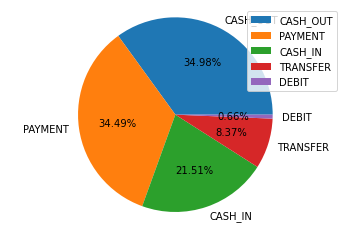

In [29]:
plt.pie(type,labels=type.index,autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [31]:
df.drop("nameOrig",axis=1,inplace=True)
df.drop("nameDest",axis=1,inplace=True)

In [33]:
labelencoder=LabelEncoder()

In [35]:
df["type"]=labelencoder.fit_transform(df["type"])

In [37]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,4,181.00,181.00,0.00,0.00,0.00,1
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
563716,1,132557.35,479803.00,347245.65,484329.37,616886.72,0
563717,3,9917.36,90545.00,80627.64,0.00,0.00,0
563718,3,14140.05,20545.00,6404.95,0.00,0.00,0
563719,3,10020.05,90605.00,80584.95,0.00,0.00,0


In [39]:
df.isFraud.value_counts()

0    562806
1       915
Name: isFraud, dtype: int64

C:\Users\Akshata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

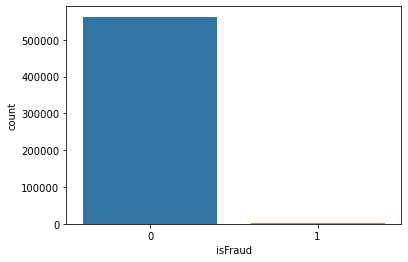

In [41]:
sns.countplot(df["isFraud"], label = 'count')

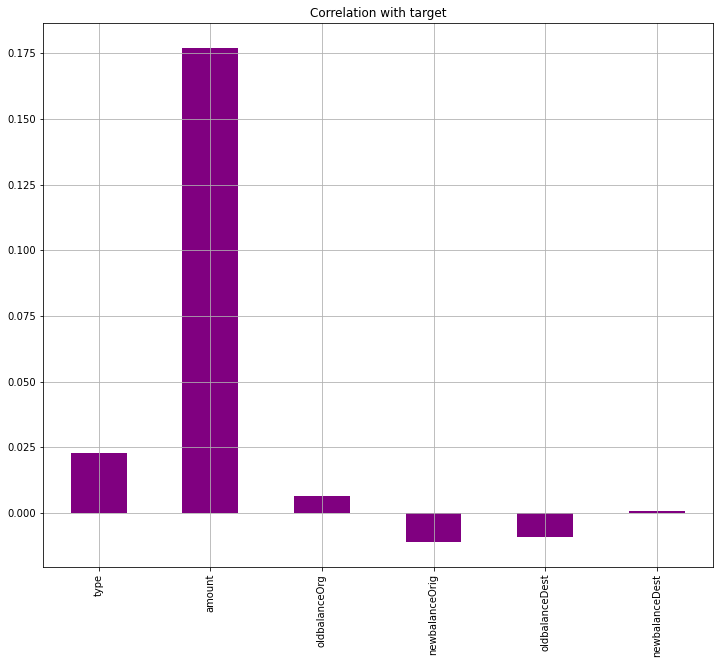

In [43]:
df.drop("isFraud", axis=1).corrwith(df.isFraud).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="purple");

In [147]:
x=np.array(df[["type","amount","oldbalanceOrg","newbalanceOrig"]])
x

array([[3.0000000e+00, 9.8396400e+03, 1.7013600e+05, 1.6029636e+05],
       [3.0000000e+00, 1.8642800e+03, 2.1249000e+04, 1.9384720e+04],
       [4.0000000e+00, 1.8100000e+02, 1.8100000e+02, 0.0000000e+00],
       ...,
       [3.0000000e+00, 1.4140050e+04, 2.0545000e+04, 6.4049500e+03],
       [3.0000000e+00, 1.0020050e+04, 9.0605000e+04, 8.0584950e+04],
       [3.0000000e+00, 1.1450030e+04, 8.0584950e+04, 6.9134920e+04]])

In [131]:
y=np.array(df[["isFraud"]])
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 ,random_state = 42)

In [149]:
x_train.shape

(394604, 4)

In [150]:
x_test.shape

(169117, 4)

In [152]:
y_train.shape

(394604, 1)

In [153]:
y_test.shape

(169117, 1)

In [154]:
lr=LogisticRegression()

In [155]:
p=lr.fit(x_train,y_train)
p

C:\Users\Akshata\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [156]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [157]:
confusion_matrix(y_test,y_pred)

array([[168776,     68],
       [     7,    266]], dtype=int64)

In [158]:
print(lr.score(x_test,y_test))

0.9995565200423375


In [159]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(lr.predict(features))

[1]


In [160]:
f=np.array([[3,9839.64,170136.00,160296.36]])
print(lr.predict(f))

[0]


In [161]:
import pickle
pickle.dump(p,open('modellr.pkl','wb'))
model=pickle.load(open('modellr.pkl','rb'))